## The factors that affect the weight of the baby at birth through out the pregnancy

### 1. Features
* Case - ID
* btw - Birthweight, in ounces
* gestation - Length of gestation, in days
* parity - Binary indicator for a first pregnancy (0 = first pregnancy)
* age - Mother's age in years
* height - Mother's height in inches
* weight - Mother's weight in pounds
* smoke - Binary indicator for whether the mother smokes

### 2. The data
https://www.kaggle.com/datasets/jacopoferretti/child-weight-at-birth-and-gestation-details/data

### 3. Steps
* Import the data
* Prepare the data
* Import tools

In [1]:
## Import the major tool

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
## Import dataset
babies = pd.read_csv("babies.csv")
babies.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


In [3]:
babies.isna().sum()

case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

In [4]:
babies.fillna(babies.mean(numeric_only=True), inplace=True)
babies.isna().sum()

case         0
bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64

In [5]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.model_selection import train_test_split

x = babies.drop('bwt', axis=1)  # Features
y = babies['bwt']  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression()}

results = {}

# Loop through the models dictionary items, fitting the model on the training data
# and appending the model name and model score on the test data to the results dictionary
for model_name, model in models.items():
    model.fit(x_train, y_train)
    results[model_name] = model.score(x_test, y_test)

# View the results
results

/Users/marypopoola/Desktop/ml/childbirth/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.008064516129032258,
 'KNN': 0.028225806451612902,
 'SVC': 0.012096774193548387,
 'LogisticRegression': 0.020161290322580645}

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression()}

results = {}

# Loop through the models dictionary items, fitting the model on the training data
# and appending the model name and model score on the test data to the results dictionary
for model_name, model in models.items():
    model.fit(x_train, y_train)
    results[model_name] = model.score(x_test, y_test)

# View the results
results

/Users/marypopoola/Desktop/ml/childbirth/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.008064516129032258,
 'KNN': 0.028225806451612902,
 'SVC': 0.012096774193548387,
 'LogisticRegression': 0.020161290322580645}

### Trying different models

In [13]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [14]:
## Trying different models

regression_models = {"Ridge": Ridge(),
                     "SVR_linear": SVR(kernel="linear"),
                     "SVR_rbf": SVR(kernel="rbf"),
                     "RandomForestRegressor": RandomForestRegressor()}

# Create an empty dictionary for the regression results
regression_results = {}

In [19]:

# Initialize models
ridge = Ridge(alpha=1.0)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
ridge.fit(x_train_scaled, y_train)
svr.fit(x_train_scaled, y_train)
rf.fit(x_train, y_train) 

RandomForestRegressor(random_state=42)

In [20]:
from sklearn.metrics import r2_score, mean_squared_error

# Predictions
y_pred_ridge = ridge.predict(x_test_scaled)
y_pred_svr = svr.predict(x_test_scaled)
y_pred_rf = rf.predict(x_test)

# Evaluation
def evaluate(y_true, y_pred, name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name}:\n  R² = {r2:.4f}\n  RMSE = {rmse:.4f}\n")

evaluate(y_test, y_pred_ridge, "Ridge Regression")
evaluate(y_test, y_pred_svr, "Support Vector Regression")
evaluate(y_test, y_pred_rf, "Random Forest Regressor")

Ridge Regression:
  R² = 0.2878
  RMSE = 16.7587

Support Vector Regression:
  R² = 0.2340
  RMSE = 17.3799

Random Forest Regressor:
  R² = 0.2537
  RMSE = 17.1555



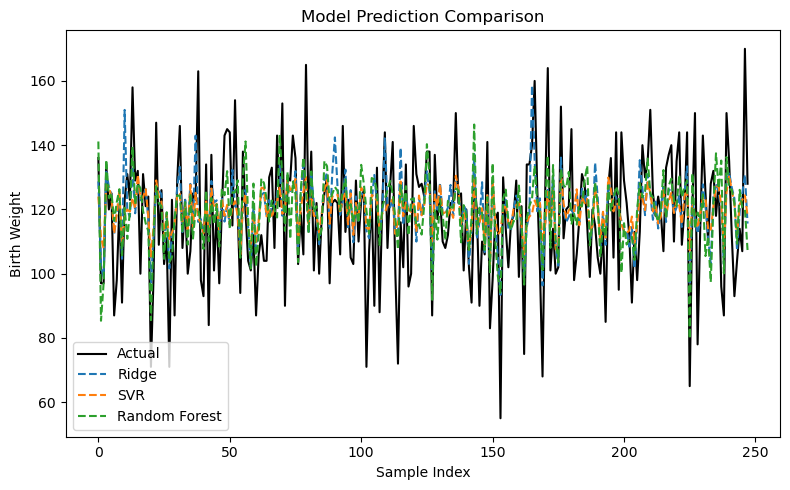

In [21]:
# Plot Comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label="Actual", color="black")
plt.plot(y_pred_ridge, label="Ridge", linestyle='--')
plt.plot(y_pred_svr, label="SVR", linestyle='--')
plt.plot(y_pred_rf, label="Random Forest", linestyle='--')
plt.legend()
plt.title("Model Prediction Comparison")
plt.xlabel("Sample Index")
plt.ylabel("Birth Weight")
plt.tight_layout()
plt.savefig("model_comparison.png")
plt.show()

### Tune hyperparameters

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(x_train_scaled, y_train)

print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best CV R^2:", ridge_grid.best_score_)

Best Ridge alpha: {'alpha': 100}
Best CV R^2: 0.21694116009387834


In [25]:
# Support Vector Regression (Tune C, epsilon, kernel)
from sklearn.svm import SVR

svr_params = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

svr_grid = GridSearchCV(SVR(), svr_params, cv=5, scoring='r2', n_jobs=-1)
svr_grid.fit(x_train_scaled, y_train)

print("Best SVR params:", svr_grid.best_params_)
print("Best CV R^2:", svr_grid.best_score_)

Best SVR params: {'C': 1, 'epsilon': 1, 'kernel': 'linear'}
Best CV R^2: 0.2120466659431819


In [27]:
# Random Forest Regressor (Tune n_estimators, max_depth)
from sklearn.ensemble import RandomForestRegressor

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(x_train, y_train)  # No scaling needed for RF

print("Best RF params:", rf_grid.best_params_)
print("Best CV R^2:", rf_grid.best_score_)

Best RF params: {'max_depth': 10, 'n_estimators': 200}
Best CV R^2: 0.19304799416788068


### Evaluate Best Models on the set

In [29]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def evaluate_model(name, model, x_test, y_test):
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name}:\n  R^2 = {r2:.4f}\n  RMSE = {rmse:.4f}\n")

evaluate_model("Ridge (Tuned)", ridge_grid.best_estimator_, x_test_scaled, y_test)
evaluate_model("SVR (Tuned)", svr_grid.best_estimator_, x_test_scaled, y_test)
evaluate_model("Random Forest (Tuned)", rf_grid.best_estimator_, x_test, y_test)

Ridge (Tuned):
  R^2 = 0.2791
  RMSE = 16.8612

SVR (Tuned):
  R^2 = 0.2994
  RMSE = 16.6218

Random Forest (Tuned):
  R^2 = 0.2624
  RMSE = 17.0548



In [30]:
ridge_grid.best_estimator_
svr_grid.best_estimator_
rf_grid.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [31]:
import joblib

# Save Ridge model
joblib.dump(ridge_grid.best_estimator_, 'ridge_best_model.pkl')

# Save SVR model
joblib.dump(svr_grid.best_estimator_, 'svr_best_model.pkl')

# Save Random Forest model
joblib.dump(rf_grid.best_estimator_, 'rf_best_model.pkl')

# Save the scaler (used for Ridge and SVR)
joblib.dump(scaler, 'scaler.pkl')

print("Models and scaler saved successfully.")

Models and scaler saved successfully.
